# SVM - Support Vector Machine

### Modelo para Regressão, Classificação e até, detecção de outliers

obs: originalmente feito para classificação em conjunto de dados pequenos ou médio

O parâmetro mais importante do SVM, como veremos, é o param $C$ (**margem de erro**) que podemos dizer que quanto maior maior a possibilidade de overfitting e quanto menor mais underfitting. Alguns valores típicos usados para primeiros testes são 0.01, 0.1, 1, 10, 100. Boas práticas para iniciar com um bom valor e depois aperfeiçoar com GridSearchCV seria analisar sensibilidade de diferentes $C$ em subconjuntos menores e validando por validação cruzada ou estimando ruas mais largas com $C$ menor ou mais estreitas com $C$ maior. Tudo dependerá do quanto você aceitará de dados marginais

#### ***Vale ressaltar que SVM tem uma altíssima sensibilidade a escalas e outliers de dados, portanto, é um modelo que exige em larga escala um pré-processamento dos dados para seu bom funcionamento***

### Classificação Linear da SVM

Quando há uma relação linear dentre duas ou mais features, podemos fazer uma classificação Linear com SVM usando o LinearSVC ou SVM(kernel = 'linear')

- #### Classificação Margem Larga


Um classificador SVM seria como desenhar três linhas que formam uma "rua" mais larga o possível, chamamos isso de ***"margem larga"***.

Cada limite das ruas são definidos por pontos de dados chamados de ***"support vectors"***. Pode-se entender que ao se criar instâncias fora da rua, a decisão da rua não será afetada pois isso não altera os vetores de suporte


- #### Classificação Margem Suave

Quando não há uma divisão clara dos dados, devemos usar uma margem suave, sabendo que teremos, dentro da "rua", violações de margem. A ideia é não escolher uma margem grande demais (pode gerar underfitting) nem pequena demais (overfitting). A premissa é encontrarmos o equilíbrio entre essas violações

Controlamos essa margem com o hiperparm $C$

Podemos plotar com 

```	python
SVC(kernel = 'linear', C = 1)
```

Ou usando 
```python
SGDClassifier(loss = 'hinge', alpha = 1/(m*C)) - para uso do gradiente descendente -> sempre use loss = 'hinge' visto que não pe default
```
Ou 
```python
LinearSVC(C = 1, loss='hinge') -> sempre use loss = 'hinge' visto que não pe default
```

### Classificação Não Linear

Há casos em que não existirá linearidade entre os dados ou uma linearidade fraca entre algumas features, nesse caso podemos adicionar característica polinomiais aos dados

- #### Kernel Polinomial

Nesse caso podemos usar o hiperparam degree nos SVM() e usar kernel = 'poly'

```python	
SVC(kernel = 'poly', degree = 3, coef0 = 1, C =1) - o coef0 adiciona um termo de bias ao produto escalar antes de elevar ao grau especificado pelo parâmetro.
```
O uso do kernel polinomial permite que o SVM projete os dados em um espaço de dimensão superior onde um hiperplano pode separar as classes de maneira mais eficaz. Isso é conhecido como o ***"kernel trick"***. Esse método não nos obriga a exponenciar os resultados para "trazer à escala original". O cálculo é feito dentro do algoritmo, e seus outputs já vêm nas escalas originais.

Lembrando que valores ideais para degree, coef0 e C podem ser encontrados com GridSearchCV e validação cruzada

- #### Kernel RBF Similaridade

Outra forma de lidar com dados não lineares é adicionar caraterística por similaridade que "computa o quanto cada instância se assemelha a um ponto específico"

O kernel RBF (Radial Basis Function) mede a similaridade entre os pontos de dados em relação a pontos de referência com base na **distância euclidiana**, e essa similaridade é usada para calcular os pesos (valores) atribuídos a cada instância.

Podemos usá-la com SVC(kernel = 'rbf', gamma = 5, C = 1)

O aumento de "gamma" \($y$\) torna a curva mais estreita e mais sobreajustada e instâncias tenham influências menores e o algortimo funcione por base dos pontos de referência. Caso se vá diminuindo "gamma" a curva se torna mais suave e ampla, onde as intâncias mais distantes terão mais influência. Portanto, aqui, gamma também é um hiperparm para controle de sobreajuste. Caso o modelo esteja sobreajustado, deve-se reduzi-lo aos poucos e vice-versa.



### Regressão SVM


É possível aplicar regressões, mas diferente da classificação, onde o algoritmo tenta criar a rua mais larga o possível com mínimas violações, a regressão se esforçar para encaixar todas as intâncias dentro da rua enquanto restringe violações

A largura da rua é controlada pelo hiperparâmetro $e$ ao invés do hiperparâmetro $C$

Podemos instanciar um algoritmo SVM de regressão usando LinearSVR(epsilon = )

Também podemos usar 

```python	
SVR(kernel = 'linear', C =, epsilon= ) 
```
SVR() também suporta os kernel tricks 'poly','rbf'


In [2]:
from sklearn.svm import LinearSVC
from sklearn import datasets

iris = datasets.load_iris()

x = iris['data'][:, (2, 3)]
y = (iris['target'] != 0)

model = LinearSVC(C = 1, loss='hinge')

model.fit(x, y)

model.predict([[5.5, 1.7]])

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([ True])

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

def plot_decision_margin(X, y, model, title, xl, yl):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")

    ax = plt.gca()

    display = DecisionBoundaryDisplay.from_estimator(
        model, X, ax=ax, cmap=plt.cm.coolwarm, alpha=0.5,
          response_method='predict'
    )
    display.plot(ax=ax, cmap='viridis', alpha=0.0005)

    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

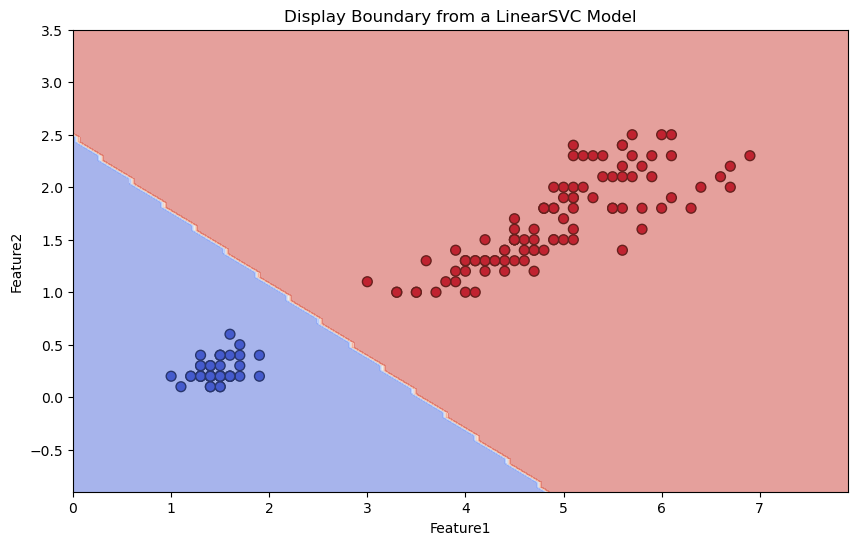

In [4]:
plot_decision_margin(x, y, model, 'Display Boundary from a LinearSVC Model', 'Feature1', 'Feature2')

## SGDClassifier

In [21]:
from sklearn.linear_model import SGDClassifier

m = x.shape[0]
C = 1
model_gde = SGDClassifier(loss='hinge', alpha=1/(m*C))

model_gde.fit(x, y)

model_gde.predict([[5.5, 1.7]])

array([ True])

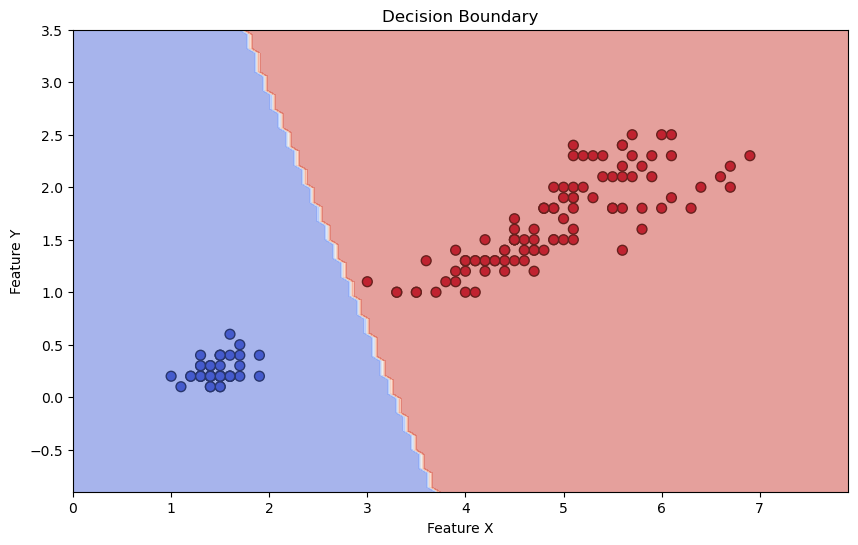

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")

ax = plt.gca()

display = DecisionBoundaryDisplay.from_estimator(
    model_gde, x, ax=ax, cmap=plt.cm.coolwarm, alpha=0.5,
        response_method='predict'
)
display.plot(ax=ax, cmap='viridis', alpha=0.0005)

plt.title('Decision Boundary')
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()

### SVC with Linear Kernel

In [24]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear', C = 1)

model_svc.fit(x, y)

model_svc.predict([[5.5, 1.7]])

array([ True])

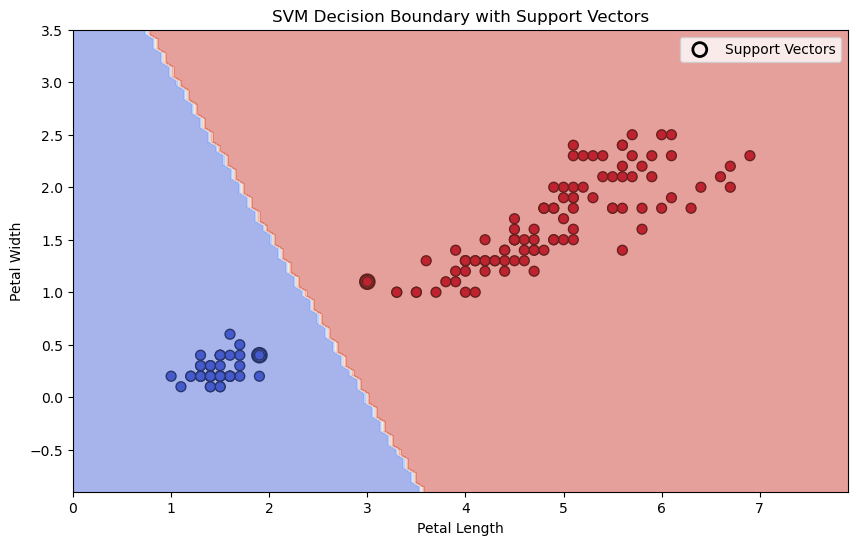

In [25]:
# Carregar os dados de exemplo
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] != 0)

# Criar e treinar o modelo SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Função para plotar a margem de decisão e destacar os vetores de suporte
def plot_decision_margin(X, y, model, title, xl, yl):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")

    # Destacar os vetores de suporte
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors', linewidths=2)

    ax = plt.gca()

    # Exibição do limite de decisão
    display = DecisionBoundaryDisplay.from_estimator(
        model, X, ax=ax, cmap=plt.cm.coolwarm, alpha=0.5, response_method='predict'
    )
    display.plot(ax=ax, cmap='viridis', alpha=0.0005)

    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.legend()
    plt.show()

# Chamar a função para plotar
plot_decision_margin(X, y, model, 'SVM Decision Boundary with Support Vectors', 'Petal Length', 'Petal Width')

### SVM não linear - Kernels Tricks

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


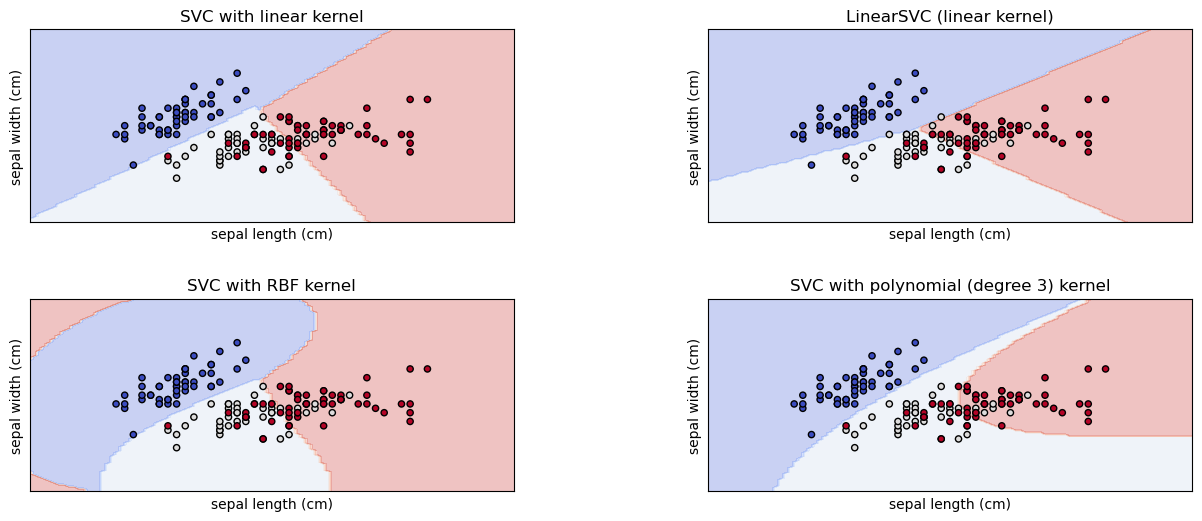

In [26]:
from sklearn import svm

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target


C = 1.0  
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


fig, sub = plt.subplots(2, 2, figsize=(15,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.3,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

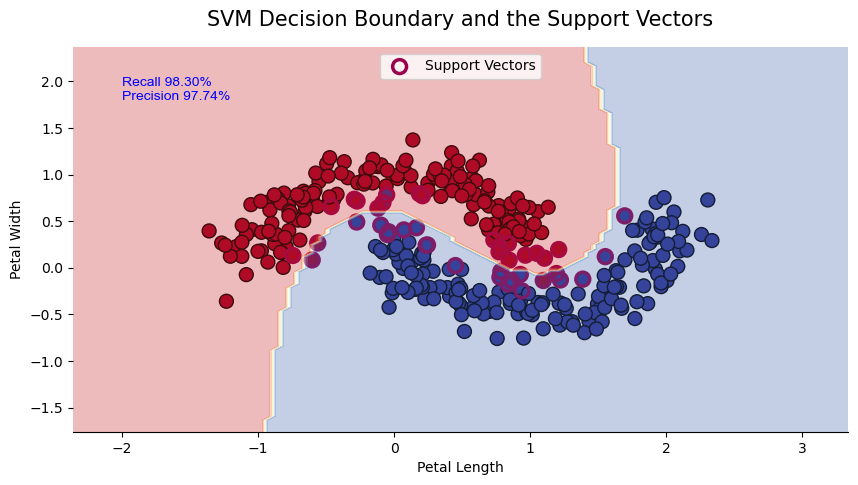

In [27]:
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

#Gerando dados do dataset Make Moons do Scikit Learning
x, y = make_moons(n_samples=500, noise=0.15)
#Subdividindo Dados de Treino e Teste
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model_poly = SVC(kernel='poly')
#Estimativas para o GridSearch
param_grid = {
    'C' : [1, 2, 5, 10, 15],
    'degree' : [1,2,3,4,5],
    'coef0' : [1, 2, 3, 5, 10]
}
#GridSearch para escolher os melhores hiperparâmetros
best_svm_poly = GridSearchCV(model_poly, param_grid, cv=5)
best_svm_poly.fit(X_train, Y_train)
#Criando Objeto para acessar os params
best_params = best_svm_poly.best_params_
#Criando Melhor Modelo
model_poly = SVC(kernel='poly', degree= best_params['degree'], coef0=best_params['coef0'], C=best_params['C'])
model_poly.fit(X_train, Y_train)
#Obtendo Recall e Precision
y_pred = cross_val_predict(model_poly, X_train, Y_train, cv=10)
precision = precision_score(Y_train, y_pred)
recall = recall_score(Y_train, y_pred)
#Criando Função para plot (reaproveitamento)
def plot_decision_margin(X, y, model, title, xl, yl):
    plt.figure(figsize=(10, 5))
    #dados Make Moons
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=100, edgecolors="k", linewidths=1)
    # Destacar os vetores de suporte
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', 
                edgecolors='#9A004B', label='Support Vectors', linewidths=2.5)
    ax = plt.gca()
    # Exibição do limite de decisão
    display = DecisionBoundaryDisplay.from_estimator(
        model, X, ax=ax, cmap=plt.cm.RdYlBu, alpha=0.3, response_method='predict'
    )
    display.plot(ax=ax, cmap='RdYlBu', alpha=0.005)
    plt.title(title, fontsize=15, pad=15, loc='center')
    plt.xlabel(xl, fontsize=10)
    plt.ylabel(yl, fontsize=10)
    plt.legend(loc='upper center')
    plt.text(x = -2, y=1.8, 
             s=f'Recall {recall:.2%} \nPrecision {precision:.2%}', 
             fontsize=10, color='b', fontweight='regular', font='Arial')
    # Remove as spines superior e direita
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.show()
# Chamar a função para plotar
plot_decision_margin(X_train, Y_train, model_poly,
                      'SVM Decision Boundary and the Support Vectors', 
                      'Petal Length', 'Petal Width')

In [12]:
param_grid = {
    'C' : [1, 5, 10],
    'degree' : [1,2,3,4,4,6,7,8,9,10],
    'coef0' : [0, 1, 10]
}

best_svm_poly = GridSearchCV(model_poly, param_grid, cv=5)

best_svm_poly.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(C=2, coef0=1, kernel='poly'),
             param_grid={'C': [1, 5, 10], 'coef0': [0, 1, 10],
                         'degree': [1, 2, 3, 4, 4, 6, 7, 8, 9, 10]})

In [13]:
best_svm_poly.best_params_

{'C': 1, 'coef0': 1, 'degree': 3}

In [14]:
lista = best_svm_poly.best_params_
lista['C']

1

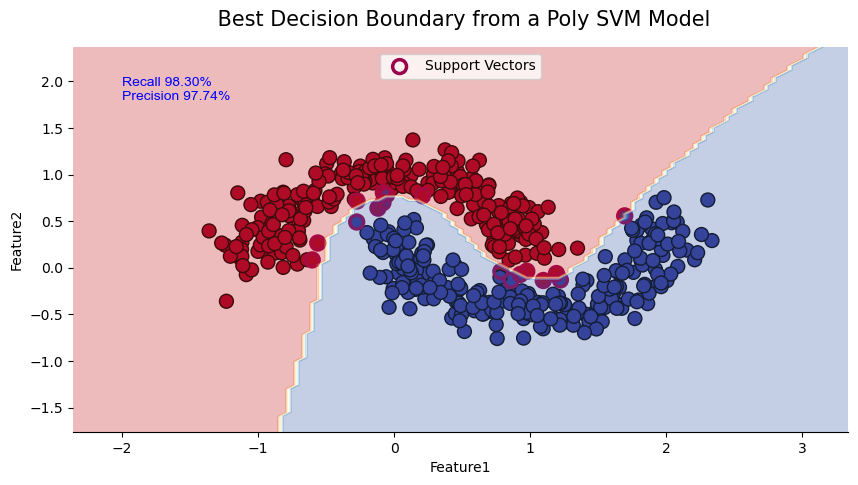

In [28]:
from sklearn.datasets import make_moons


model_poly = SVC(kernel='poly', degree= 9, coef0=1, C=1)

model_poly.fit(x, y)


plot_decision_margin(x, y, model_poly, ' Best Decision Boundary from a Poly SVM Model', 'Feature1', 'Feature2')

### SVM Regressões

In [16]:
from sklearn.svm import LinearSVR, SVR

x = iris['data'][:, (2, 3)]
y = (iris['target'] != 0)

svm_reg = LinearSVR(epsilon=1.5)

svm_reg.fit(x,y)

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [17]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x,y)

SVR(C=100, degree=2, kernel='poly')